# Fashion-MNIST Dataset Classification with Scikit-Learn and PyTorch

In this project, we'll create a classifier using the fashion-MNIST dataset. We'll start with data exploration and a baseline model using Scikit-Learn's Logistic Regression. Then, we'll build a more advanced model using PyTorch to create a neural network. This step-by-step guide is designed to be completed in small sections of 5-10 minutes each.

## High Level outline

### 1) Fetching, using, and manipulating datasets
- Requires knowing sklearn, numpy, matplotlib, and pandas
### 2) Baseline ML training with sklearn
- Use sklearn to train and evaluate your model on the data
### 3) Create your own SimpleNN and CNN
- Use pytorch to pull in data, train your model and evaluate it
### 4) Compare Sklearn and your custom models

# Sources You should use for your project

- [NumPy Documentation](https://numpy.org/doc/)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
- [PyTorch Documentation](https://pytorch.org/)



## Table of Contents
- [Step 0 Install all necessary libraries](#step-0-install-all-necesssary-libraries) 
- [Step 1 Import Libraries and Load Dataset](#step-1-import-libraries-and-load-dataset)
- [Step 2 Explore the dataset](#step-2-explore-the-dataset)
- [Step 3 Preprocess and normalize the data](#step-3-preprocess-and-normalize-data)
- [Step 4 Split the data into test and training](#step-4-split-data-into-training-and-testing-sets)
- [Step 5 baseline model with sklearn](#step-5-baseline-model-with-scikit-learn-linear-models)
- [Step 6 evalute the baseline model](#step-6-evaluate-baseline-model)
- [Step 7 convert the data to pytorch tensors](#step-7-convert-data-to-pytorch-tensors)
- [Step 8 Create DataLoaders](#step-8-create-dataloaders)
- [Steo 9 Define custom NN with pytorch](#step-9-define-the-pytorch-neural-network-model)
- [Step 10 Train your NN](#step-10-train-the-neural-network)
- [Step 11 Visualize the training loss](#step-11-visualize-training-loss)
- [Step 12 Evaluate the NN model](#step-12-evaluate-neural-network-model)
- [Step 13 Create a confusion matrix](#step-13-confusion-matrix-and-sample-predictions)
- [Step 14 Visualize classification vectors of custom NN](#step-14-visualizing-classification-vectors-of-a-neural-network)
- [Step 15 Repeat steps 7-14 for CNN](#step-15-repeat-steps-7-14-for-a-custom-cnn-model)
- [Step 16 Convert data to tensors](#step-16-convert-the-data-to-tensors)
- [Step 17 Create DataLoaders](#step-17-create-data-loaders)
- [Step 18 Define simple CNN model](#step-18-define-a-simple-cnn-model)
- [Step 19 Train CNN](#step-19-train-the-cnn-model)
- [Step 20 Visualize the training loss](#step-20-visualize-the-training-loss)
- [Step 21 Evaluate the CNN model](#step-21-evaluate-the-cnn-model)
- [Step 22 Create a confusion matrix](#step-22-plot-the-confusion-matrix-and-sample-predictions) 
- [Step 23 Visualize the classification vectors](#step-23-visualize-classification-vectors-for-the-cnn)
- [Step 24 Display the feature maps for CNN](#step-24-display-the-feature-maps-for-your-convolutional-network)
- [Step 25 Compare and contrast prebuilt models vs your custom models](#step-25-compare-the-different-models-accuracy)

# Step 1. Import Libraries and Load Dataset
Estimated Time: 5 minutes

First, we'll import all the necessary libraries and load the MNIST dataset from fetch_openml.

### Library Imports Overview

In this project, we use several powerful libraries and modules to handle data processing, build neural networks, and visualize results. Below is a breakdown of each library and module and how it contributes to our project.

---

#### 1. `torch`
The `torch` library is the core of the PyTorch framework, a popular open-source library for machine learning and deep learning. PyTorch provides efficient, flexible tensor operations that enable us to perform mathematical operations on multidimensional arrays (tensors), which are essential for neural networks. We use `torch` for creating and manipulating tensors that store our data and for performing the calculations required during neural network training.

**From the docs:**
The torch package contains data structures for multi-dimensional tensors and defines mathematical operations over these tensors. Additionally, it provides many utilities for efficient serialization of Tensors and arbitrary types, and other useful utilities.

It has a CUDA counterpart, that enables you to run your tensor computations on an NVIDIA GPU with compute capability >= 3.0.

---

#### 2. `torch.nn`
The `torch.nn` module is part of PyTorch and provides tools for creating neural network layers and defining complex models. The `nn` module includes pre-built layers like fully connected (`Linear`), convolutional (`Conv2d`), and activation functions (`ReLU`). By using `torch.nn`, we can build each part of a neural network and chain them together to create the final model.

---

#### 3. `torch.optim`
The `torch.optim` module provides various optimization algorithms for training neural networks. Optimization is a key step in machine learning, where we adjust the model’s parameters to minimize the error in predictions. `optim` contains optimizers such as **Stochastic Gradient Descent (SGD)** and **Adam**, which update the model's weights during training based on the gradients computed from the loss function.

---

#### 4. `torch.utils.data`
The `torch.utils.data` module offers utilities for working with datasets, particularly in batching and loading data. It includes:
   - **`DataLoader`**: Manages and batches data, making it easy to feed data into our model in small groups, which is essential for efficient training.
   - **`TensorDataset`**: Wraps tensors into a dataset object, allowing us to combine data and labels into a single dataset that can be loaded by `DataLoader`.

These tools help us efficiently load and prepare data for training and testing our model.

---

#### 5. `sklearn.datasets.fetch_openml`
`fetch_openml` is a function within the `sklearn.datasets` module, part of the Scikit-Learn library. It allows us to download popular datasets hosted on the [OpenML platform](https://www.openml.org/). In this project, we use `fetch_openml` to easily access and load the **MNIST dataset**, a collection of handwritten digits commonly used for training and testing image classification models.

---

#### 6. `numpy`
`numpy` is a fundamental library for scientific computing in Python, providing support for efficient numerical operations on large, multidimensional arrays. In this project, we use `numpy` to handle data operations like reshaping images or performing mathematical calculations on arrays. PyTorch integrates well with `numpy`, allowing for smooth transitions between `numpy` arrays and PyTorch tensors, making it essential for data preparation and processing.

---

#### 7. `matplotlib.pyplot`
`matplotlib.pyplot` is a submodule of Matplotlib, a popular Python plotting library. `plt` (as it’s commonly abbreviated) enables us to create data visualizations like line plots, bar charts, and images. In our project, we use `plt` to visualize training results, such as loss over time, and to display images from our dataset, which helps in understanding the model’s behavior and performance.

---

Each of these libraries plays a critical role in our project, from data handling and visualization to building and training the neural network.


In [1]:
# Import libraries

# AI libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_openml

# non AI libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(pd.__version__)




2.0.3


You can find the datasets we will be using today on this website: https://openml.org/search?type=data&status=active&id=40996

In [2]:
from sklearn.datasets import fetch_openml

# Load Fashion MNIST dataset using fetch_openml
fashion_mnist = fetch_openml(name='Fashion-MNIST', version=1)

# print the description of the dataset
print(fashion_mnist.DESCR)



/home/hunt3041/python_stine/project/.venv/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

# Step 2. Explore the Dataset
Estimated Time: 5 minutes

Let's take a quick look at the dataset to understand its structure.

In [3]:
# Extract data from download
X = fashion_mnist.data
y = fashion_mnist.target
target_names = fashion_mnist.target_names

# Check the shape of the data
print("shape of X: ", X.shape)
print("Shape of y: ", y.shape)

# Show the information about the data using info() method
print(X.info())
print(y.info())

# Show the structure of the data using head() method
X.head(), y.head()

shape of X:  (70000, 784)
Shape of y:  (70000,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype   
--------------  -----   
70000 non-null  category
dtypes: category(1)
memory usage: 68.9 KB
None


(   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
 2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0    33.0   
 4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
    pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
 1      0.0  ...     119.0     114.0     130.0      76.0       0.0       0.0   
 2     22.0  ...       0.0       0.0       1.0       0.0       0.0       0.0   
 3     96.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
 4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
 
    pixel781  pixel782  pixel783  pixel784  
 0 

### Display the fist image in the dataset

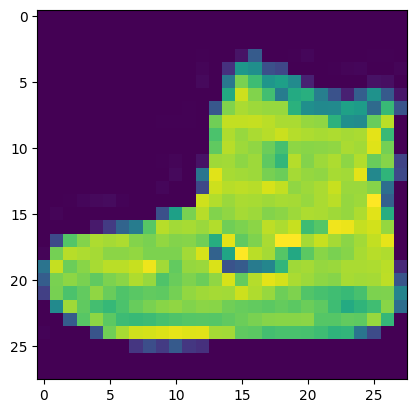

In [4]:
# Display the first image in the dataset using matplotlibs imshow() method
plt.imshow(np.array(X.iloc[0]).reshape((28, 28)))


## Step 3. Preprocess and Normalize Data

Estimated Time: 5 minutes


In [5]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)


### Reshape the data to 3 dimensions. 

In [6]:
# images_reshaped = np.zeros((70000, 28, 28))
# for i in range(len(X_norm)):
#     image = np.array(X_norm[i]).reshape((28, 28))
#     images_reshaped[i] = image

# plt.imshow(images_reshaped[0])


## Step 4. Split Data into Training and Testing Sets
Estimated Time: 5 minutes

Split the data into training and testing sets using `train_test_split`. Set test_size and random_state.

In [6]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

## Step 5. Baseline Model with Scikit-Learn linear models
Estimated Time: 10 minutes

Train the following 3 algorithms with the data:
- Logistic Regression model. Use the `lbfgs` as your solver
- Ridge Classifier
- SGD Classifier

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split

# Train the Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, verbose=1)
log_reg.fit(X_train, y_train)

# Train Ridge Classifier
ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train, y_train)

# Trian SGD Classifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7850     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28945D+05    |proj g|=  2.78765D+03


 This problem is unconstrained.



At iterate   50    f=  2.43083D+04    |proj g|=  2.11094D+02

At iterate  100    f=  2.20914D+04    |proj g|=  4.53425D+02

At iterate  150    f=  2.10700D+04    |proj g|=  7.08865D+01

At iterate  200    f=  2.05348D+04    |proj g|=  3.16637D+01

At iterate  250    f=  2.02153D+04    |proj g|=  2.58315D+01

At iterate  300    f=  2.00212D+04    |proj g|=  2.89101D+01

At iterate  350    f=  1.99094D+04    |proj g|=  2.49843D+01

At iterate  400    f=  1.98420D+04    |proj g|=  2.19508D+01

At iterate  450    f=  1.97792D+04    |proj g|=  1.95509D+01

At iterate  500    f=  1.97420D+04    |proj g|=  1.25667D+01

At iterate  550    f=  1.97127D+04    |proj g|=  1.65094D+01

At iterate  600    f=  1.96898D+04    |proj g|=  1.12404D+01

At iterate  650    f=  1.96752D+04    |proj g|=  9.60344D+00

At iterate  700    f=  1.96633D+04    |proj g|=  5.69384D+00

At iterate  750    f=  1.96527D+04    |proj g|=  5.92668D+00

At iterate  800    f=  1.96472D+04    |proj g|=  3.80476D+00

At iter

/home/hunt3041/python_stine/project/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SGDClassifier()

## Step 6. Evaluate Baseline Model
Estimated Time: 10 minutes

Predict on the test set and evaluate the baseline model's accuracy.

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Compare the performance of each model

# Logistic regression model
y_pred_log_reg = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg, average='macro')
log_reg_precision = precision_score(y_test, y_pred_log_reg, average='macro')


# Ridge Classifier model
y_pred_ridge_clf = ridge_clf.predict(X_test)
ridge_clf_acc = accuracy_score(y_test, y_pred_ridge_clf)
ridge_clf_recall = recall_score(y_test, y_pred_ridge_clf, average='macro')
ridge_clf_precision = precision_score(y_test, y_pred_ridge_clf, average='macro')

# SGD Classifier model 
y_pred_sgd_clf = sgd_clf.predict(X_test)
sgd_clf_acc = accuracy_score(y_test, y_pred_sgd_clf)
sgd_clf_recall = recall_score(y_test, y_pred_sgd_clf, average='macro')
sgd_clf_precision = precision_score(y_test, y_pred_sgd_clf, average='macro')

print(f"Logistic Regression Model:\nAccuracy: {log_reg_acc}\nRecall: {log_reg_recall}\nPrecision: {log_reg_precision}\n")
print(f"Ridge Classifier Model:\nAccuracy: {ridge_clf_acc}\nRecall: {ridge_clf_recall}\nPrecision: {ridge_clf_precision}\n")
print(f"SGD Classifier Model:\nAccuracy: {sgd_clf_acc}\nRecall: {sgd_clf_recall}\nPrecision: {sgd_clf_precision}\n")




Logistic Regression Model:
Accuracy: 0.8523571428571428
Recall: 0.8523646656264899
Precision: 0.8508635920006128

Ridge Classifier Model:
Accuracy: 0.8197142857142857
Recall: 0.8200646838370632
Precision: 0.8167738241529644

SGD Classifier Model:
Accuracy: 0.8438571428571429
Recall: 0.8445784070318526
Precision: 0.846717008079616



### Plot the classification vectors for the 3 different algorithms. 

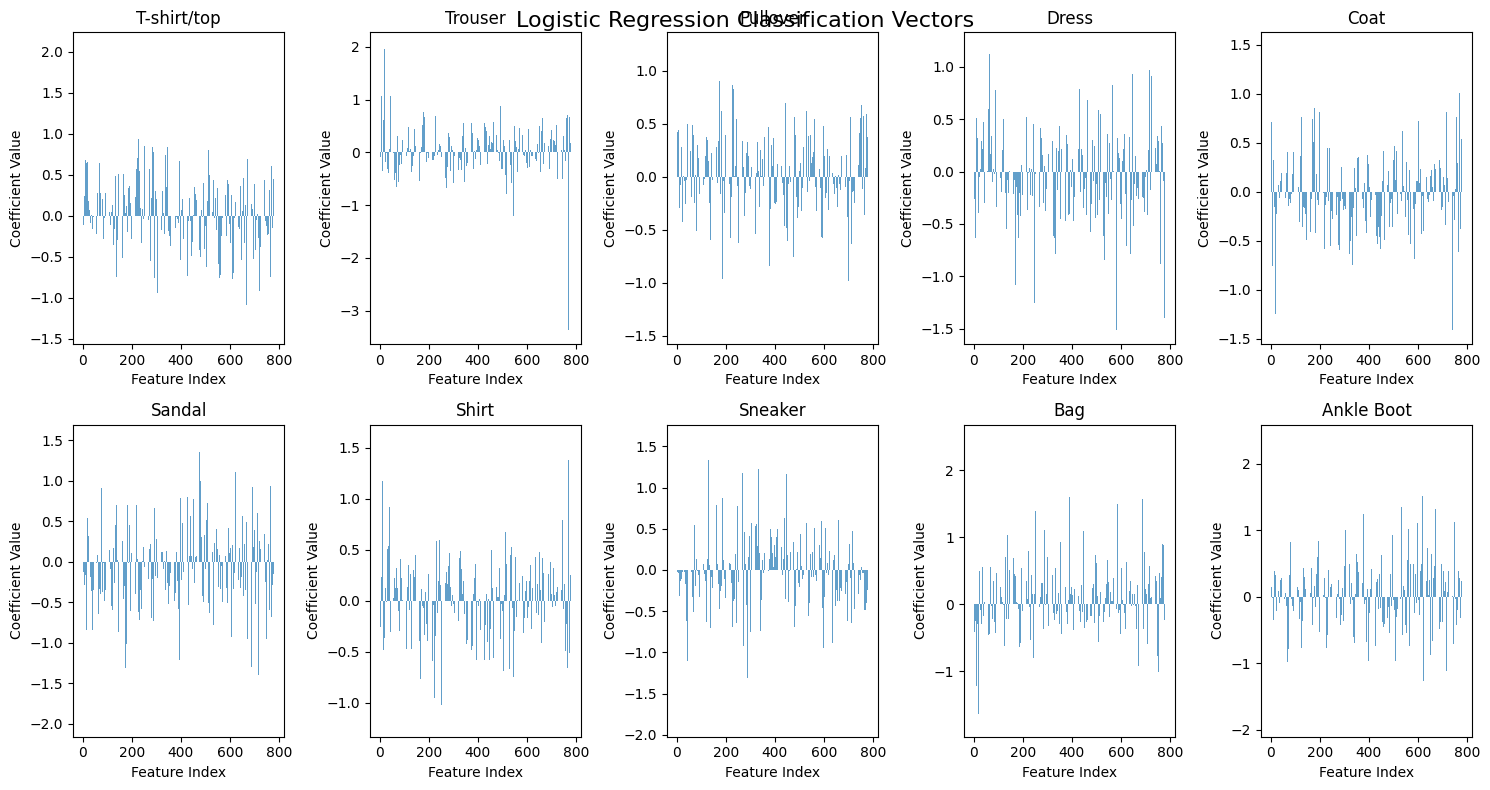

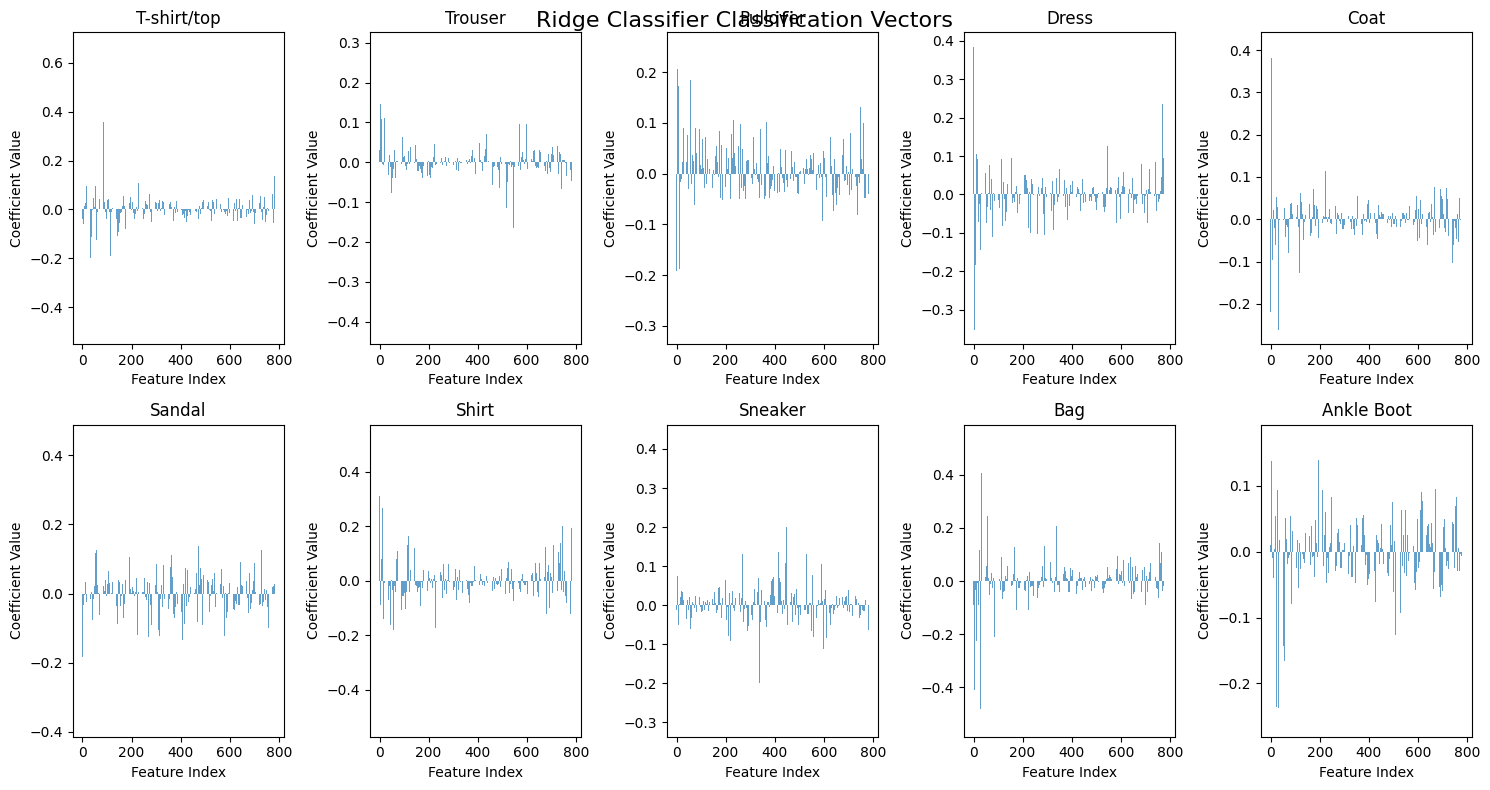

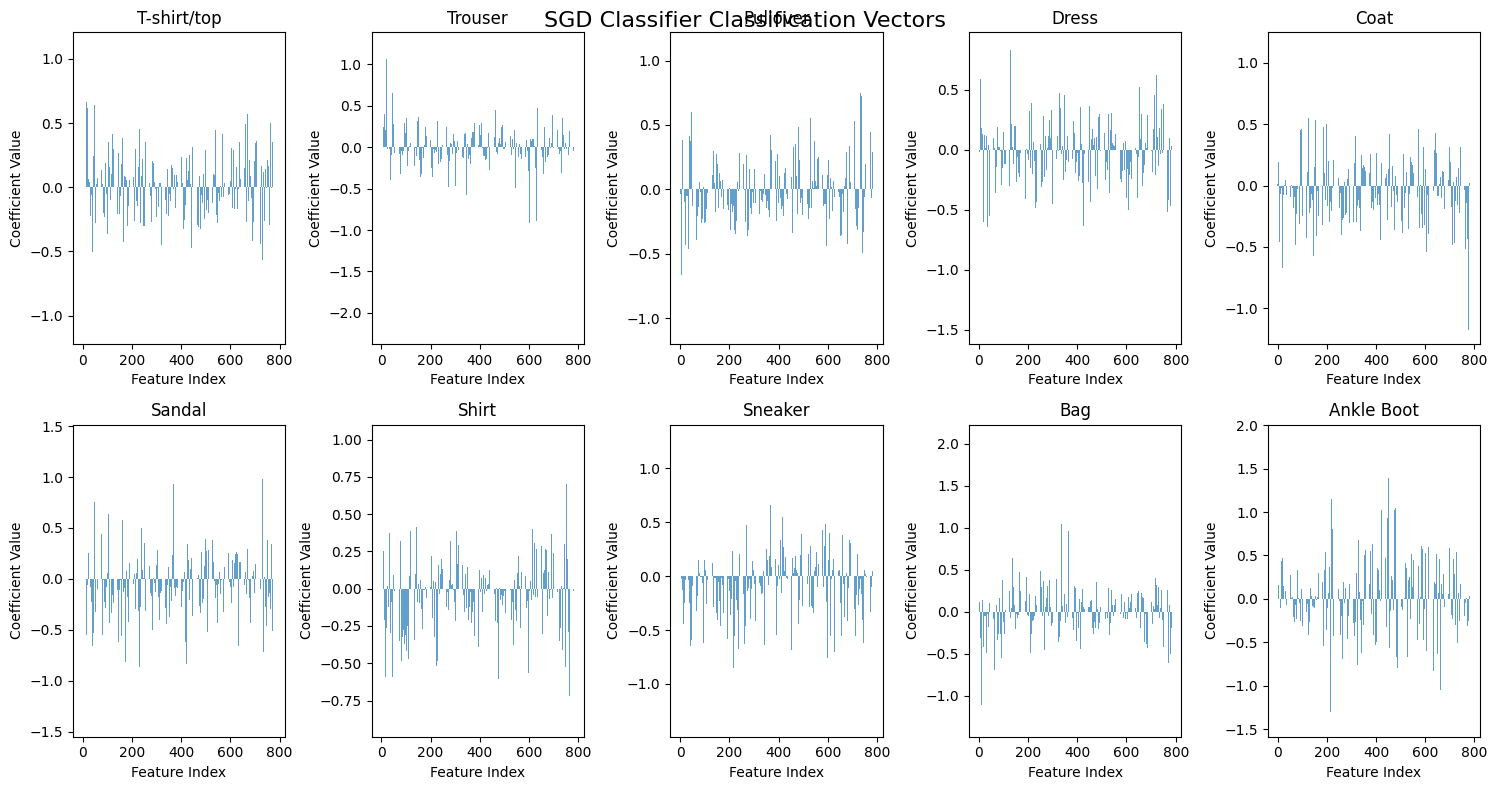

In [36]:

# Get the coefficients for each classifier
coef_log_reg = log_reg.coef_
coef_ridge_clf = ridge_clf.coef_
coef_sgd_clf = sgd_clf.coef_

# Get the classes for each classifier.
# Classes for each classifier are the same
classes = ridge_clf.classes_


# Get the intercepts for each classifier
int_log_reg = log_reg.intercept_
int_ridge_clf = ridge_clf.intercept_
int_sgd_clf = sgd_clf.intercept_

# Get the n_features for each classifier
# This is simply the number of features of each image. Each image is 28X28=784
n_features = 784

# Define the descriptive labels for each class
target_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Plot the classification vectors for each classifier and each class
# Function to plot classification vectors
def plot_classification_vectors(coef, classifier_name, target_names):
    plt.figure(figsize=(15, 8))
    for i, class_name in enumerate(target_names):
        plt.subplot(2, 5, i + 1)  # Arrange plots in a 2x5 grid for 10 classes
        plt.bar(np.arange(len(coef[i])), coef[i], alpha=0.7)
        plt.title(class_name)
        plt.xlabel("Feature Index")
        plt.ylabel("Coefficient Value")
        plt.tight_layout()
    plt.suptitle(f"{classifier_name} Classification Vectors", fontsize=16)
    plt.show()

# Plot for each classifier
plot_classification_vectors(coef_log_reg, "Logistic Regression", target_names)
plot_classification_vectors(coef_ridge_clf, "Ridge Classifier", target_names)
plot_classification_vectors(coef_sgd_clf, "SGD Classifier", target_names)



# Moving to tensorflow

In this section we will create two different custom made neural networks. The goal is to deepen your understanding about both the easy of python and the basics of machie learning. 

## Step 7. Convert Data to PyTorch Tensors
Estimated Time: 5 minutes

Convert the pandas DataFrames and Series to PyTorch tensors.

In [14]:

y.to_numpy()

array(['9', '0', '0', ..., '8', '1', '5'], dtype=object)

In [19]:
# Convert data to tensors for a simple neural network
X_train_tensor = torch.tensor(X_train)
X_test_tensor = torch.tensor(X_test)
y_train_tensor = torch.tensor(y_train.to_numpy(dtype=float))
y_test_tensor = torch.tensor(y_test.to_numpy(dtype=float))


## Step 8. Create DataLoaders
Estimated Time: 5 minutes

Create `TensorDataset` and `DataLoader` objects for batch processing

In [12]:
# Create TensorDatasets

# Create DataLoaders


## Step 9. Define the PyTorch Neural Network Model
Estimated Time: 10 minutes

Define a simple feedforward neural network using PyTorch's `nn.Module`.

In [13]:
# Define the neural network model

# Instantiate the model

# Define loss function and optimizer


## Step 10. Train the Neural Network
Estimated Time: 10 minutes

Train the neural network over several epochs.

In [14]:
# Training loop



## Step 11. Visualize Training Loss
Estimated Time: 5 minutes

Plot the training loss over epochs to see how the model learns.

In [15]:
# Plot training loss over epochs



## Step 12. Evaluate Neural Network Model
Estimated Time: 10 minutes

Evaluate the trained neural network on the test set.

In [16]:
# Evaluate the model on the test set

# Calculate accuracy


## Step 13. Confusion Matrix and Sample Predictions

Estimated Time: 10 minutes

Visualize the model's performance with a confusion matrix and sample predictions.

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Collect all predictions and true labels


# Confusion Matrix



In [18]:
# Display a few test images with predictions



## Step 14. Visualizing Classification Vectors of a Neural Network

In this task, you will visualize the classification vectors of a neural network by extracting the weights from the final layer and reshaping them to match the input dimensions. This helps in understanding how the neural network differentiates between different classes based on the learned features.

In [19]:
# Extract the weights from the final layer

# Plot the classification vectors for each class


## Step 15 Repeat steps 7-14 for a custom CNN model
We want to test how a CNN would perform compared to our simple Neural Network

## Step 16 Convert the data to tensors

In [20]:
# Reshape data for CNN

# Convert data to tensors


## Step 17 Create Data Loaders

In [21]:
# Create TensorDatasets


# Create DataLoaders


## Step 18 Define a simple CNN model

In [22]:
# Define the CNN model

# Instantiate the CNN model

# Define loss function and optimizer



## Step 19 Train the CNN model

In [23]:
# Training loop for CNN


## Step 20 Visualize the Training Loss 

In [24]:
# Plot training loss over epochs for CNN


## Step 21 Evaluate the CNN model

In [25]:
# Evaluate the CNN model on the test set

# Calculate accuracy


## Step 22 Plot the Confusion matrix and Sample Predictions

In [26]:
# Collect all predictions and true labels for CNN

# Confusion Matrix


In [27]:
# Display a few test images with predictions from CNN


## Step 23. Visualize Classification Vectors for the CNN

In [28]:

# Extract the weights from the final layer

# Plot the classification vectors for each class

## Step 24 Display the feature maps for your convolutional network

In [29]:
# Select an input image

# Forward pass through conv1

# Plot the feature maps



## Step 25. Compare the different models accuracy

Estimated Time: 5 minutes
